### Bias & Variance

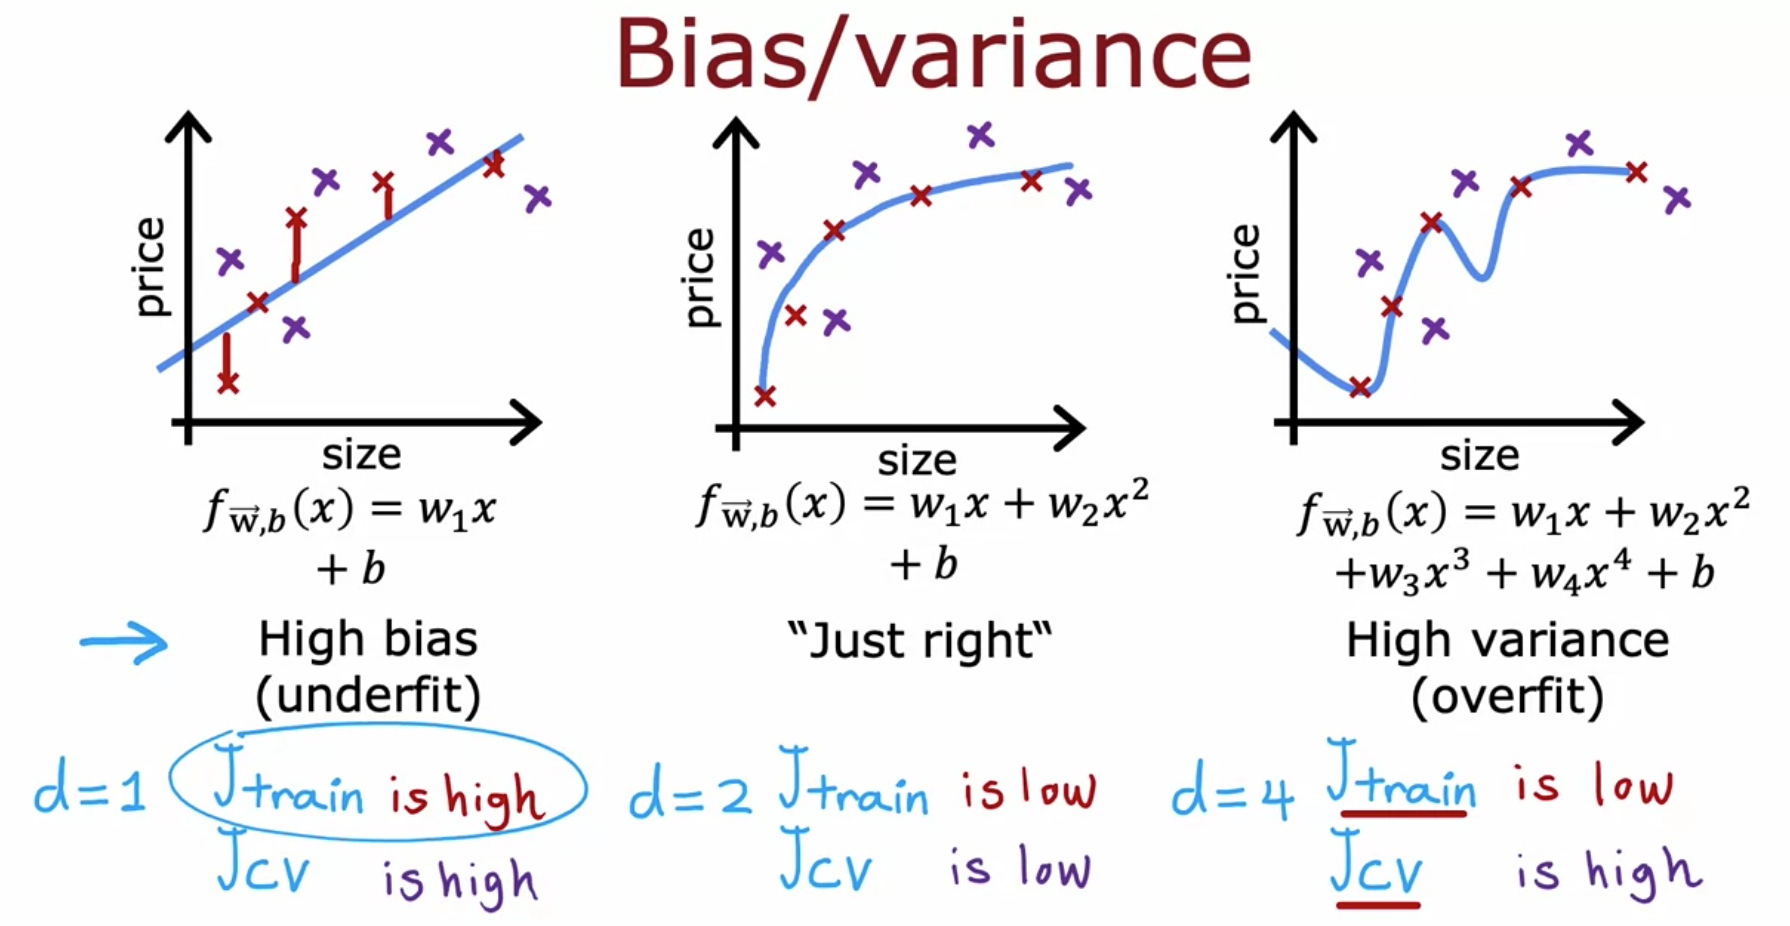

The leftmost figure shows a high bias problem where the model is not capturing the patterns in the training data. As a result, you will have a high training and cross validation error. The rightmost figure, on the other hand, shows a high variance problem where the model has overfit the training set. Thus, even though it has a low training error, it will perform poorly on new examples. That is indicated by a high cross validation error. The ideal model would be the figure in the middle, where it successfully learns from the training set and also generalizes well to unseen data. The lectures gave some tips on what to do next to achieve this "just right" model. 

To fix a high bias problem, you can:
* try adding polynomial features
* try getting additional features
* try decreasing the regularization parameter

To fix a high variance problem, you can:
* try increasing the regularization parameter
* try smaller sets of features
* get more training examples

You will try all these tips in this repositry. Let's begin!

In [23]:
# for building linear regression models
from sklearn.linear_model import LinearRegression, Ridge

import utils 

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [24]:
def prepare_dataset(filename):
    
    data = np.loadtxt(filename, delimiter=",")
    
    x = data[:,:-1]
    y = data[:,-1]
    
    
    x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=80)

   
    x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=80)
    
    return x_train, y_train, x_cv, y_cv, x_test, y_test

In [33]:
\
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data1.csv')

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")


print(f"first 5 rows of the training inputs (1 feature):\n {x_train[:5]}\n")


model = LinearRegression()



the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3757.57575758]
 [2878.78787879]
 [3545.45454545]
 [1575.75757576]
 [1666.66666667]]



In [35]:
from sklearn.base import clone
def train_poly(modele,x_train,y_train,x_cv,y_cv,max_degree=10,baseline=None):
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    degrees = range(1,max_degree+1)

    
    for degree in degrees:

        
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)

        
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        model=clone(modele)
        model.fit(X_train_mapped_scaled, y_train )
        models.append(model)

        
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

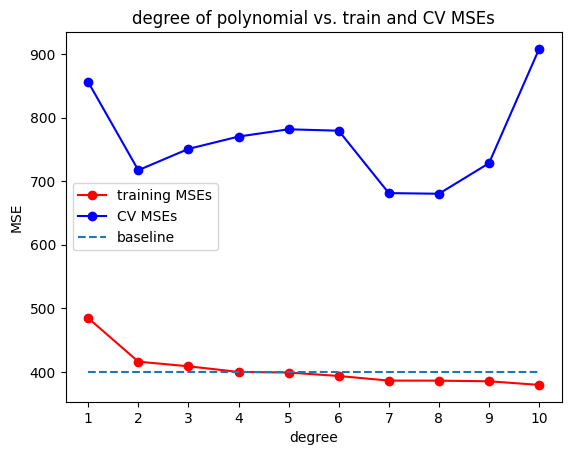

In [36]:
train_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=400)

As you can see, the more polynomial features you add, the better the model fits to the training data. In this example, it even performed better than the baseline. At this point, you can say that the models with degree greater than 4 are low-bias because they perform close to or better than the baseline.

However, if the baseline is defined lower (e.g. you consulted an expert regarding the acceptable error), then the models are still considered high bias. You can then try other methods to improve this.

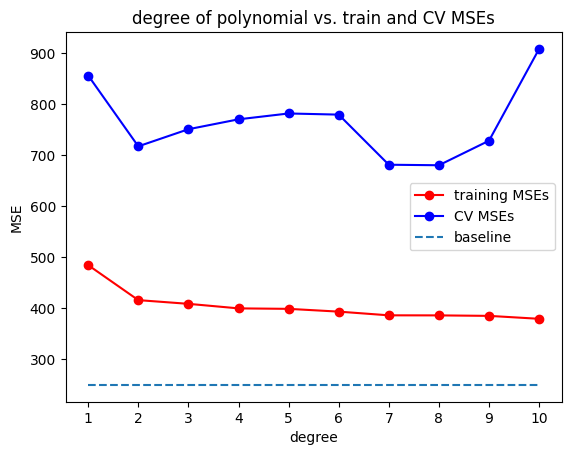

In [37]:
train_poly(LinearRegression(),x_train,y_train,x_cv,y_cv,10,250)

### Try getting additional features

Another thing you can try is to acquire other features. Let's say that after you got the results above, you decided to launch another data collection campaign that captures another feature. Your dataset will now have 2 columns for the input features as shown below.

In [45]:
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data2.csv')

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (2 features):\n {x_train[:5]}\n")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (2 features):
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]



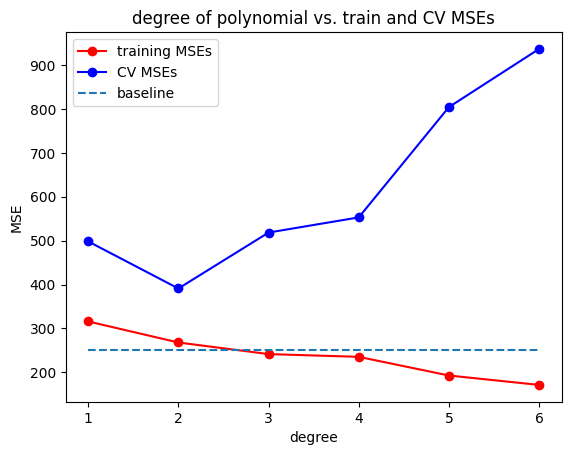

In [52]:
# Instantiate the model class
model = LinearRegression()


train_poly(model, x_train, y_train, x_cv, y_cv, max_degree=6, baseline=250)

### Try decreasing the regularization parameter

At this point, you might want to introduce regularization to avoid overfitting. One thing to watch out for is you might make your models underfit if you set the regularization parameter too high. The cell below trains a 4th degree polynomial model using the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class which allows you to set a regularization parameter (i.e. lambda or $\lambda$). You will try several values and compare the results.

In [53]:
def train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 1, baseline=None):
    
    train_mses = []
    cv_mses = []
    models = []
    scalers = []

    
    for reg_param in reg_params:

        
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)


        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        model_base=Ridge()
        model=clone(model_base)

        model.set_params(alpha=reg_param)
        model.fit(X_train_mapped_scaled, y_train)
        models.append(model)

    
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(reg_params, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.plot(reg_params, np.repeat(baseline, len(reg_params)), linestyle='--', label='baseline')
    plt.title("lambda vs. train and CV MSEs")
    plt.xlabel("lambda"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

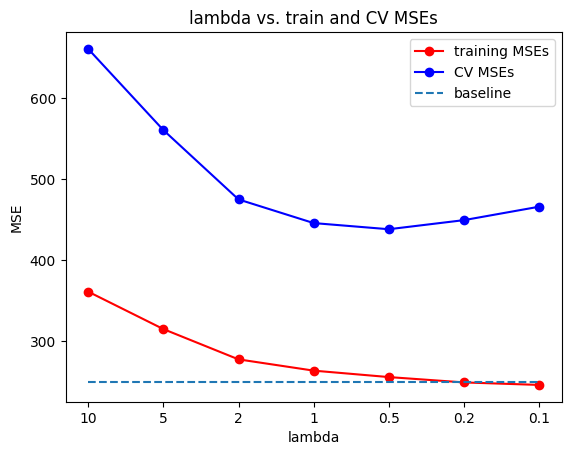

In [54]:
# Define lambdas to plot
reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]


utils.train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

The resulting plot shows an initial $\lambda$ of `10` and as you can see, the training error is worse than the baseline at that point. This implies that it is placing a huge penalty on the `w` parameters and this prevents the model from learning more complex patterns in your data. As you decrease $\lambda$, the model loosens this restriction and the training error is able to approach the baseline performance.

## Fixing High Variance

You will now look at some things to try when your model has overfit the training set. The main objective is to have a model that generalizes well to new examples so you want to minimize the cross validation error.

### Try increasing the regularization parameter

In contrast to the last exercise above, setting a very small value of the regularization parameter will keep the model low bias but might not do much to improve the variance. As shown below, you can improve your cross validation error by increasing the value of $\lambda$.

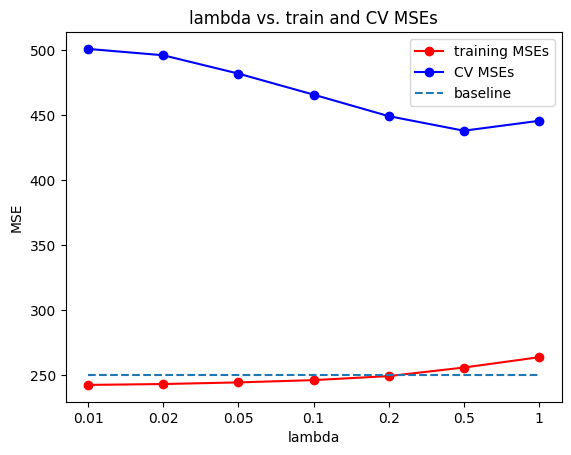

In [56]:
# Define lambdas to plot
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

### Try smaller sets of features

You've already seen in my previous repository that having too many polynomial terms can result in overfitting. You can reduce the number of such terms and see where you get the best balance of training and cross validation error. Another scenario where reducing the number of features would be helpful is when you have irrelevant features in your data. For example, patient IDs that hospitals give will not help in diagnosing a tumor so you should make sure to remove it from your training data. 

To illustrate how removing features can improve performance, you will do polynomial regression for 2 datasets: the same data you used above (2 features) and another with a random ID column (3 features). You can preview these using the cell below. Notice that 2 columns are identical and a 3rd one is added to include random numbers.

In [57]:

x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data2.csv')


print(f"first 5 rows of the training set with 2 features:\n {x_train[:5]}\n")


x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data3.csv')


print(f"first 5 rows of the training set with 3 features (1st column is a random ID):\n {x_train[:5]}\n")

first 5 rows of the training set with 2 features:
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]

first 5 rows of the training set with 3 features (1st column is a random ID):
 [[1.41929130e+07 3.75757576e+03 5.49494949e+00]
 [1.51868310e+07 2.87878788e+03 6.70707071e+00]
 [1.92662630e+07 3.54545455e+03 3.71717172e+00]
 [1.25222490e+07 1.57575758e+03 5.97979798e+00]
 [1.76537960e+07 1.66666667e+03 1.61616162e+00]]



Now you will train the models and plot the results. The solid lines in the plot show the errors for the data with 2 features while the dotted lines show the errors for the dataset with 3 features. As you can see, the one with 3 features has higher cross validation error especially as you introduce more polynomial terms. This is because the model is also trying to learn from the random IDs even though it has nothing to do with the target. 

Another way to look at it is to observe the points at degree=4. You'll notice that even though the *training error* is lower with 3 features, the *gap between the training error and cross validation error* is a lot wider than when you only use 2 features. This should also warn you that the model is overfitting.

In [60]:
def train_plot_diff_datasets(modele, files, max_degree=10, baseline=None):
    
    for file in files:
        
        x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset(file['filename'])

        train_mses = []
        cv_mses = []
        models = []
        scalers = []
        degrees = range(1,max_degree+1)

       
        for degree in degrees:

            
            poly = PolynomialFeatures(degree, include_bias=False)
            X_train_mapped = poly.fit_transform(x_train)

            
            scaler_poly = StandardScaler()
            X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
            scalers.append(scaler_poly)

            model=clone(modele)
            model.fit(X_train_mapped_scaled, y_train )
            models.append(model)

            # Compute the training MSE
            yhat = model.predict(X_train_mapped_scaled)
            train_mse = mean_squared_error(y_train, yhat) / 2
            train_mses.append(train_mse)

            # Add polynomial features and scale the cross-validation set
            poly = PolynomialFeatures(degree, include_bias=False)
            X_cv_mapped = poly.fit_transform(x_cv)
            X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

            # Compute the cross-validation MSE
            yhat = model.predict(X_cv_mapped_scaled)
            cv_mse = mean_squared_error(y_cv, yhat) / 2
            cv_mses.append(cv_mse)

        # Plot the results
        plt.plot(degrees, train_mses, marker='o', c='r', linestyle=file['linestyle'], label=f"{file['label']} training MSEs"); 
        plt.plot(degrees, cv_mses, marker='o', c='b', linestyle=file['linestyle'], label=f"{file['label']} CV MSEs"); 

    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

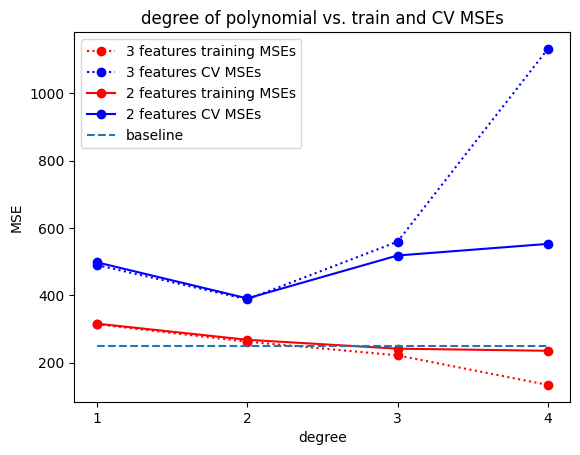

In [61]:

model = LinearRegression()

# Define properties of the 2 datasets
file1 = {'filename':'data/c2w3_lab2_data3.csv', 'label': '3 features', 'linestyle': 'dotted'}
file2 = {'filename':'data/c2w3_lab2_data2.csv', 'label': '2 features', 'linestyle': 'solid'}
files = [file1, file2]

train_plot_diff_datasets(model, files, max_degree=4, baseline=250)

### Get more training examples

Lastly, you can try to minimize the cross validation error by getting more examples. In the cell below, you will train a 4th degree polynomial model then plot the *learning curve* of your model to see how the errors behave when you get more examples.

In [62]:
def train_plot_learning_curve(modele, x_train, y_train, x_cv, y_cv, degree= 1, baseline=None):
    
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    num_samples_train_and_cv = []
    percents = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

     
    for percent in percents:
        
        num_samples_train = round(len(x_train) * (percent/100.0))
        num_samples_cv = round(len(x_cv) * (percent/100.0))
        num_samples_train_and_cv.append(num_samples_train + num_samples_cv)
        
        x_train_sub = x_train[:num_samples_train]
        y_train_sub = y_train[:num_samples_train]
        x_cv_sub = x_cv[:num_samples_cv]
        y_cv_sub = y_cv[:num_samples_cv]
 
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train_sub)

         
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        model=clone(modele)
        model.fit(X_train_mapped_scaled, y_train_sub)
        models.append(model)

         
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train_sub, yhat) / 2
        train_mses.append(train_mse)

        
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv_sub)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv_sub, yhat) / 2
        cv_mses.append(cv_mse)

    
    plt.plot(num_samples_train_and_cv, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(num_samples_train_and_cv, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.plot(num_samples_train_and_cv, np.repeat(baseline, len(percents)), linestyle='--', label='baseline')
    plt.title("number of examples vs. train and CV MSEs")
    plt.xlabel("total number of training and cv examples"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

In [63]:

x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data4.csv')
print(f"the shape of the entire training set (input) is: {x_train.shape}")
print(f"the shape of the entire training set (target) is: {y_train.shape}\n")
print(f"the shape of the entire cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the entire cross validation set (target) is: {y_cv.shape}\n")

model = LinearRegression()



the shape of the entire training set (input) is: (600, 2)
the shape of the entire training set (target) is: (600,)

the shape of the entire cross validation set (input) is: (200, 2)
the shape of the entire cross validation set (target) is: (200,)



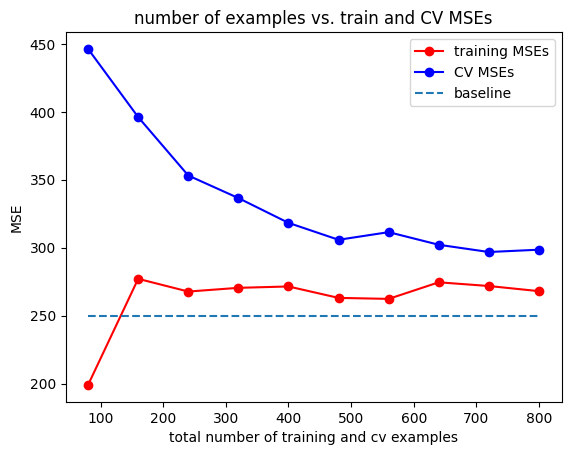

In [64]:

train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

From the results, it shows that the cross validation error starts to approach the training error as you increase the dataset size. Another insight you can get from this is that adding more examples will not likely solve a high bias problem. That's because the training error remains relatively flat even as the dataset increases.
